In [110]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
# importing the usual libraries. 

In [111]:
df=pd.read_csv("cars-dataset.csv") # converting data into a panda dataframe.

In [112]:
#calling fucntions to go through the dataframe.
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [113]:
df.tail()

,car name,cyl,disp,hp,wt,acc,yr,mpg
393,ford mustang gl,4,140.0,86,2790,15.6,82,27.0
394,vw pickup,4,97.0,52,2130,24.6,82,44.0
395,dodge rampage,4,135.0,84,2295,11.6,82,32.0
396,ford ranger,4,120.0,79,2625,18.6,82,28.0
397,chevy s-10,4,119.0,82,2720,19.4,82,31.0


In [114]:
df.shape

(398, 8)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [116]:
df.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [117]:
temp = pd.DataFrame(df.hp.str.isdigit())
temp[temp['hp']==False]
#the hp column has non  digit string values.

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [118]:
df.loc[330,["hp"]]
#The non-digit values are "?"symbols.

hp    ?
Name: 330, dtype: object

In [119]:
df["hp"]= df['hp'].replace("?",np.nan)

In [120]:
# filling the missing values in all columns with their column medians. 
num_col=df.drop('car name',axis=1)
car_names=df["car name"]
num_col=num_col.apply(lambda x: x.fillna(x.median()),axis=1)
df=num_col.join(car_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl         398 non-null float64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null float64
acc         398 non-null float64
yr          398 non-null float64
mpg         398 non-null float64
car name    398 non-null object
dtypes: float64(6), object(2)
memory usage: 25.0+ KB


In [121]:
# summary statistics of the numerical data. 
# 'dsp' and 'wt' show quite a bit of right scew. 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [122]:
df["hp"]=df.hp.astype("int")
df['car name']=df['car name'].astype('category')


C:\Users\Abhyuday\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Abhyuday\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Abhyuday\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Abhyuday\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Abhyuday\A

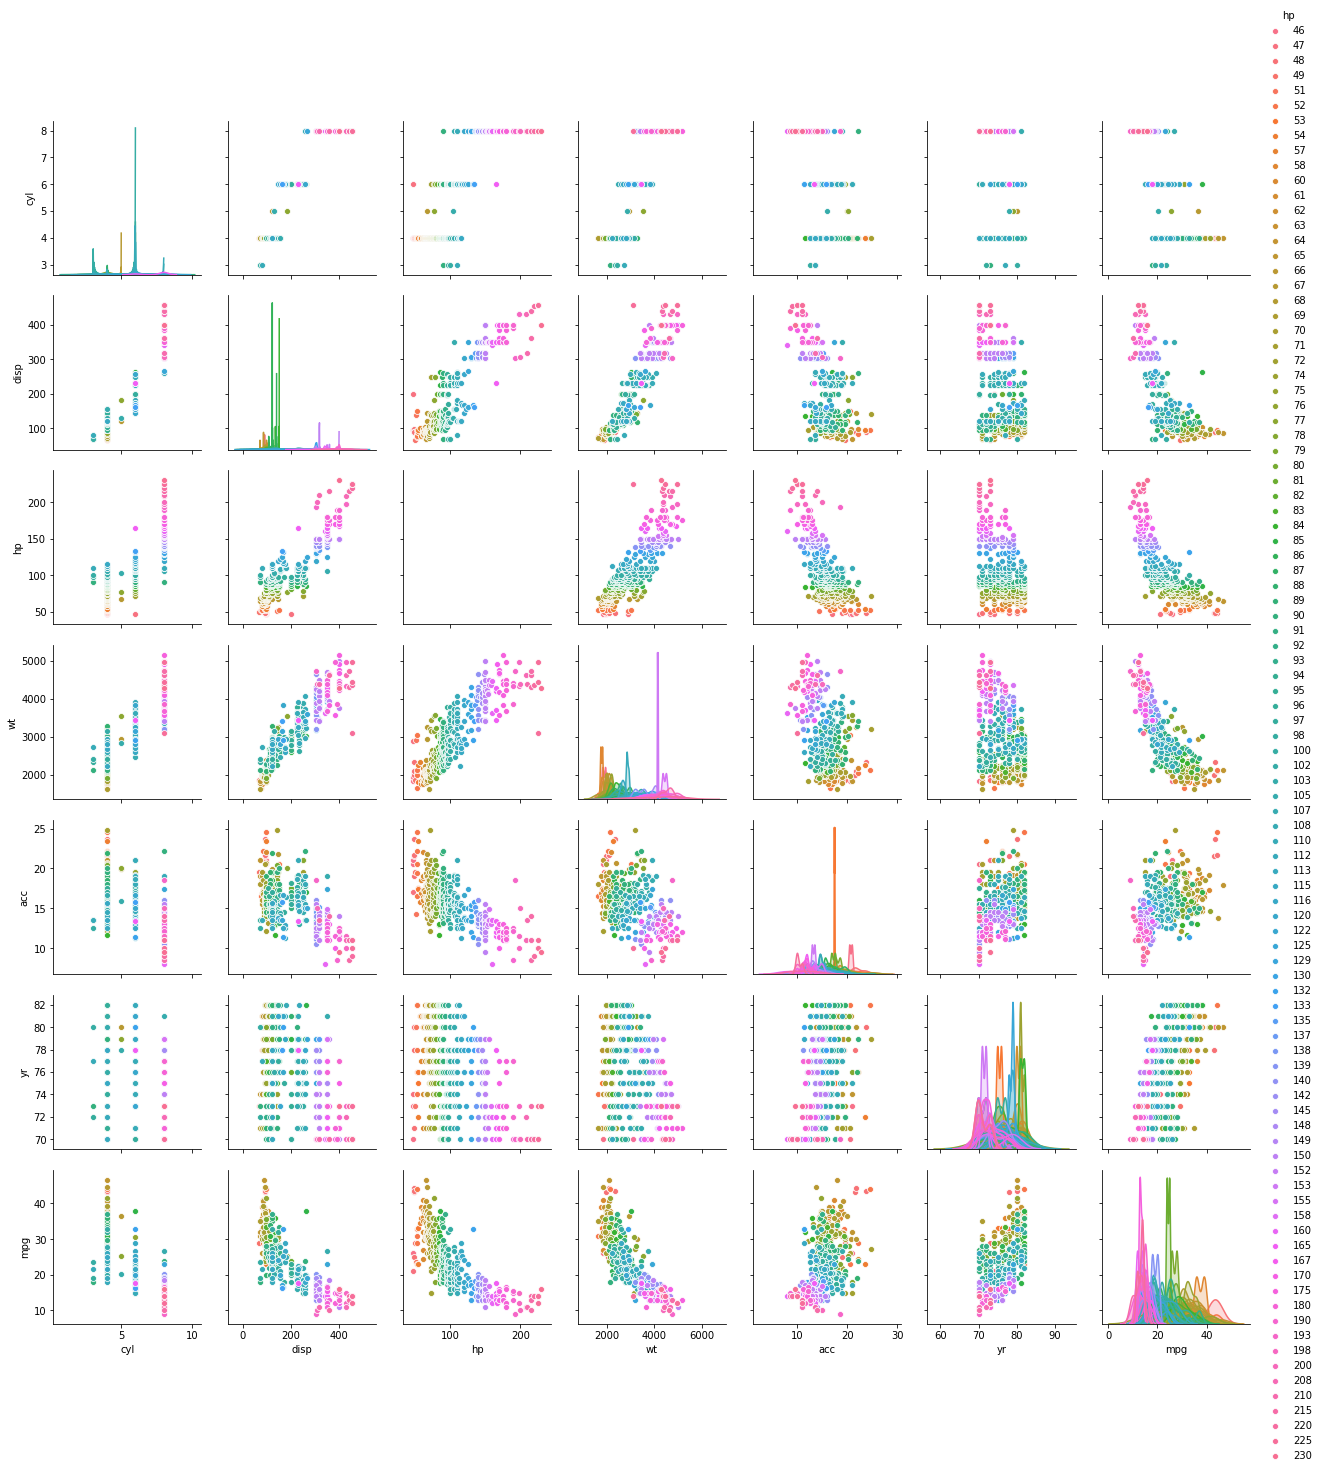

In [196]:
sns.pairplot(df,diag_kind="kde",hue='hp')

In [124]:
# Based on the pairplot above--
# The paramerters appear to be multicollinear , no distinctive multimodalities obsereved in the diagonal KDE dsitributions.
# On two dimentions, with the 'hp' parameter, no hidden clusters are apparent.  

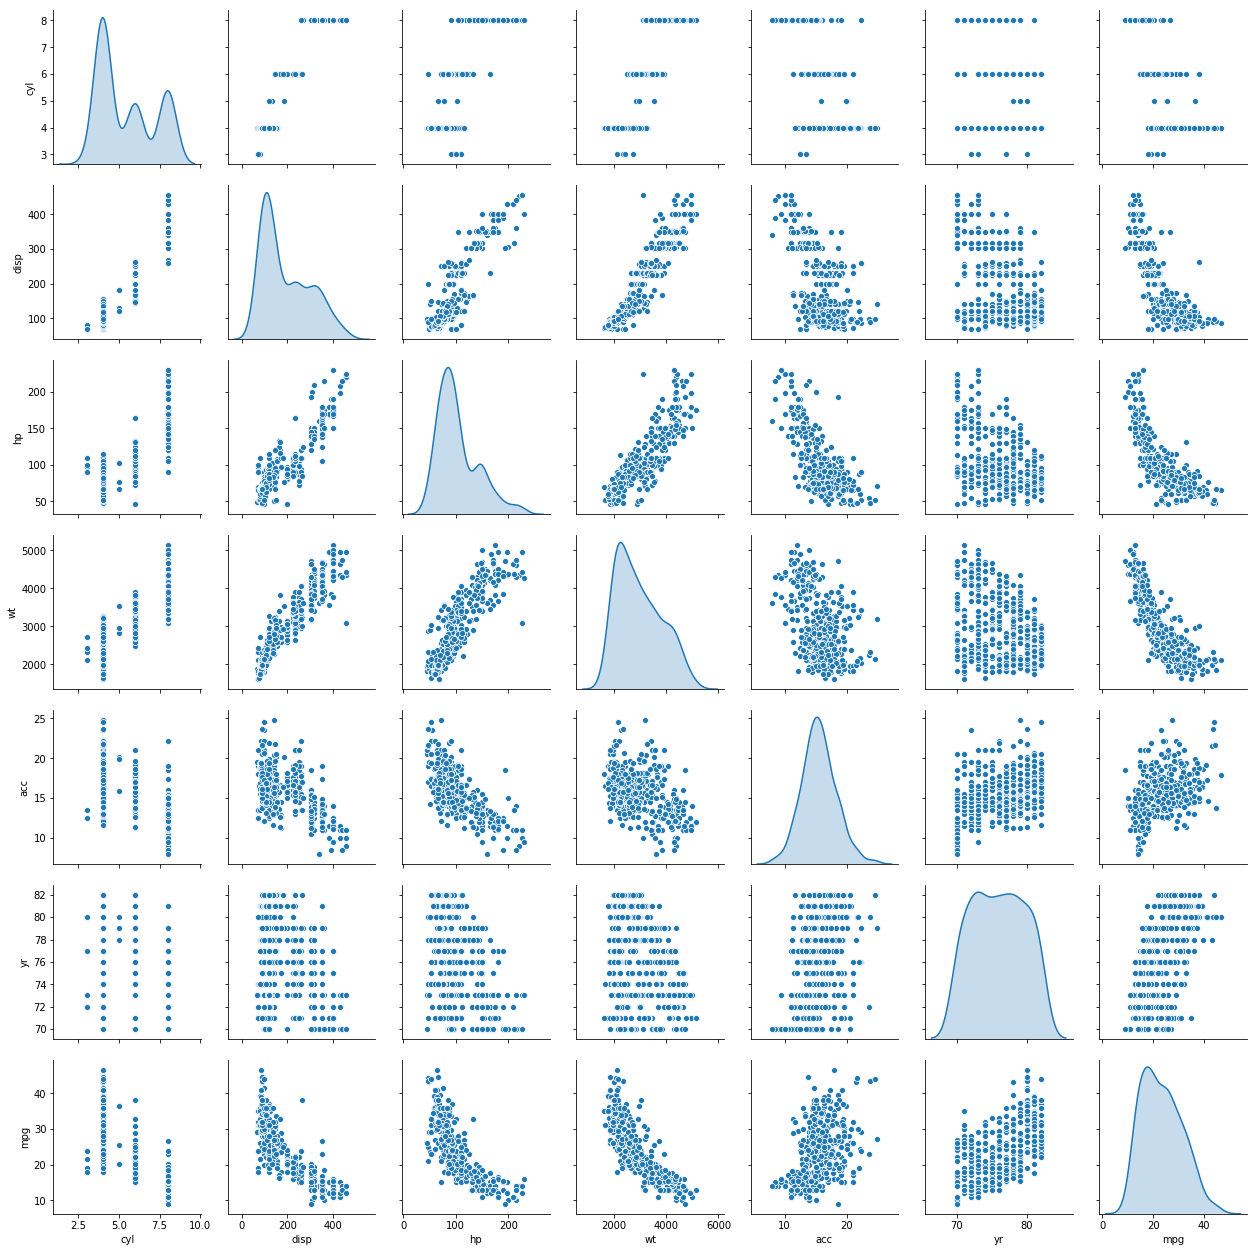

In [197]:
sns.pairplot(df,diag_kind='kde')
#"cyl"  ,"hp" and "disp" appear to  show multimodal peaks, with 'cyl' showing 3 distinct peaks, "disp" 3 curves and 'hp' 2 curves.
#but overall there don't seem to be any hidden patterns.
# clustering this dataset might not throw any valuable new information about the data. 

In [126]:
# dropping the string variable and converting the data into standard scales,
from scipy.stats import zscore
df_z=df.drop('car name', axis=1)
df_z=df_z.apply(zscore)
df_z.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.680348,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.585270,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197446,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197446,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.938897,0.565841,-1.840117,-1.627426,-0.834543


In [127]:
df_z_arr=np.array(df_z)

In [128]:
# using K-Means algorithm to attempt to cluster the data.
# To find the optimal number of clusters which approximates the natural number of clusters if any,
# The algorithm is iterated under a for/next loop to find cluster inertia for 2 to 5 clusters.
# Based on the pariplots above , there might be two to five clusters.
from sklearn.cluster import KMeans
cluster_range = range( 2, 6)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_z_arr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,1295.022588
1,3,947.069822
2,4,739.130072
3,5,665.816953


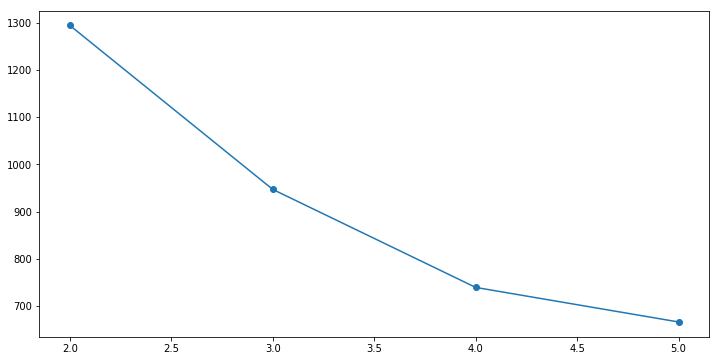

In [129]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [130]:
# Based on the elbow plot above, there might be 3 or 4 clusters.

In [131]:
# The difference in the within cluster variance between 2 and 3 clusters= 
1295.022588-947.069822

347.952766

In [132]:
# Between 3 and 4 clusters=
947.069822-739.130072

207.93975

In [133]:
# It is likely that there 3 or 4 clusters, trying 3 clusters=

In [134]:
cluster = KMeans( n_clusters = 3, random_state = 16)
cluster.fit(df_z_arr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=16, tol=0.0001, verbose=0)

In [135]:
centroids = cluster.cluster_centers_
centroids

array([[-0.85347696, -0.80321374, -0.67522379, -0.78549879,  0.36133415,
         0.30992304,  0.75394661],
       [ 1.49819126,  1.50068407,  1.51042668,  1.40001604, -1.07612225,
        -0.6725559 , -1.15871315],
       [ 0.35772459,  0.24687769, -0.03874177,  0.30829922,  0.28578589,
        -0.00272145, -0.47905415]])

In [136]:
centroid_df = pd.DataFrame(centroids, columns = list(df_z) )
centroid_df
# The centroid co-rdinatees do show differences in clusters, especially noted  in "disp","hp", "mpg" and "wt". 

,cyl,disp,hp,wt,acc,yr,mpg
0,-0.853477,-0.803214,-0.675224,-0.785499,0.361334,0.309923,0.753947
1,1.498191,1.500684,1.510427,1.400016,-1.076122,-0.672556,-1.158713
2,0.357725,0.246878,-0.038742,0.308299,0.285786,-0.002721,-0.479054


In [28]:
prediction=cluster.predict(df_z)
df_z=df_z.join(car_names)

In [137]:
df_z.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.680348,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.585270,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197446,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197446,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.938897,0.565841,-1.840117,-1.627426,-0.834543


In [138]:
df_z["GROUP"] = prediction 
# Assigining cluster lables to the datapoints. 

In [143]:
df_z.head()

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.498191,1.090604,0.680348,0.630870,-1.295498,-1.627426,-0.706439,1
1,1.498191,1.503514,1.585270,0.854333,-1.477038,-1.627426,-1.090751,1
2,1.498191,1.196232,1.197446,0.550470,-1.658577,-1.627426,-0.706439,1
3,1.498191,1.061796,1.197446,0.546923,-1.295498,-1.627426,-0.962647,1
4,1.498191,1.042591,0.938897,0.565841,-1.840117,-1.627426,-0.834543,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A05FF7390>,
      dtype=object)

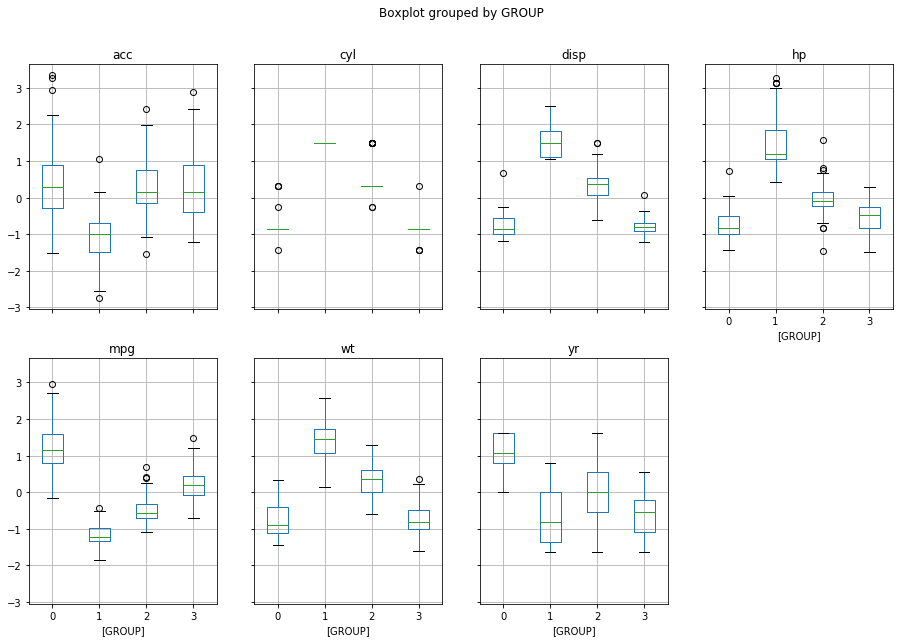

In [145]:
df_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [146]:
# The boxplot confirms the cluster differences noted while analysing the centroid co-ordinates. 
# Many outliers noted. 

In [147]:
# Replacing all outliers with the median.
# NOTE - new outliers would be created, the distribution of the variables would change, hypothesis testing about whether 
# the distributions would have changed significantly, NOT DONE. 
def function(group):
    median,std=group.median(),group.std()
    outliers=(group-median).abs()>1.96*std
    group[outliers]=group.median()
    return group 

df_z_correct=(df_z.groupby("GROUP").transform(function))


C:\Users\Abhyuday\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [148]:
new_data= df_z_correct.join(df_z['GROUP'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A02A362B0>,
      dtype=object)

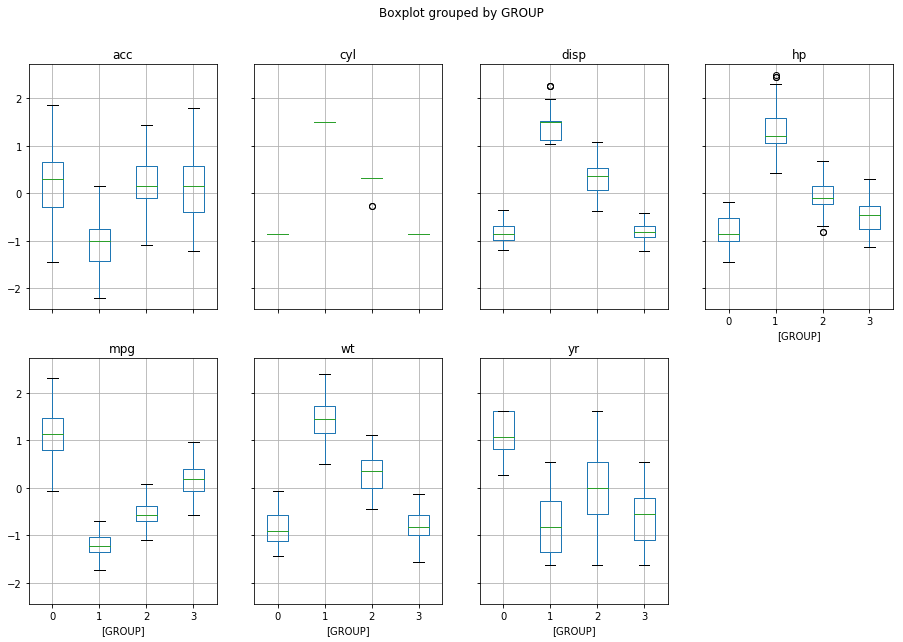

In [149]:
new_data.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [150]:
new_data=new_data.sort_values(by=["GROUP"])

In [151]:
# Splicing the datapoints accoring to their cluster labels. 
reg0=new_data.loc[new_data["GROUP"]==0,:]
reg1=new_data.loc[new_data["GROUP"]==1,:]
reg2=new_data.loc[new_data["GROUP"]==2,:]

In [152]:
# Splitting each cluster into independent and dependant variables. 
X0=reg0.drop("mpg",axis=1)
y0=reg0[['mpg']]
X1=reg1.drop("mpg",axis=1)
y1=reg1[["mpg"]]
X2=reg2.drop('mpg',axis=1)
y2=reg2[['mpg']]

In [153]:
# Splitting each cluster into training and test sets, 
from sklearn.model_selection import train_test_split
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.30 , random_state=24)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30 , random_state=23)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30 , random_state=234)

In [154]:
# Performing Linear Regression on each of the three clusters (reg0,reg1,reg2) independently,
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train0, y_train0)
regression_model.score(X_train0, y_train0)


0.40462550411210957

In [155]:
regression_model.score(X_test0, y_test0)

0.41978875491543366

In [156]:
for idx, col_name in enumerate(X_train0.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.0
The coefficient for disp is -0.5771275030652484
The coefficient for hp is -0.00497708691576285
The coefficient for wt is -0.6293734481580916
The coefficient for acc is -0.08796507848194796
The coefficient for yr is 0.2917933123724674
The coefficient for GROUP is 0.0


In [157]:
regression_model = LinearRegression()
regression_model.fit(X_train1, y_train1)
regression_model.score(X_train1, y_train1)


0.4122802138335283

In [158]:
regression_model.score(X_test1, y_test1)

0.02214356435734699

In [160]:
for idx, col_name in enumerate(X_train1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.15546915173808548
The coefficient for disp is -0.08932371663736667
The coefficient for hp is -0.054478686717698926
The coefficient for wt is -0.17906305344847095
The coefficient for acc is -0.13327799066909438
The coefficient for yr is 0.09603961861388871
The coefficient for GROUP is 0.0


In [161]:
regression_model = LinearRegression()
regression_model.fit(X_train2, y_train2)
regression_model.score(X_train2, y_train2)

0.22636742460506198

In [162]:
regression_model.score(X_test2, y_test2)

0.38601261941855797

In [164]:
for idx, col_name in enumerate(X_train2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.0871922164517011
The coefficient for disp is 0.01686678940997141
The coefficient for hp is -0.06358890404184626
The coefficient for wt is -0.24435809594276622
The coefficient for acc is -0.08579597734478044
The coefficient for yr is 0.12454974416443394
The coefficient for GROUP is 0.0


In [165]:
# As it is observed, performing linear regression independently on the clusters provides very poor accuracies.

In [166]:
# This might be for many reasons
#1. The number of clusters do not approximate the number of natural clusters.
#2. This dataset has no hidden clusters.
#3. The data when spliced into their constituent clusters, become too few in terms of number of datapoints to built an accurate model.

In [167]:
########### SECOND ITERATION WITH 4 CLUSTERS, the steps are repeated as above################

In [168]:
df_z.head()
df_z2=df_z.drop("GROUP",axis=1)

In [169]:
cluster = KMeans( n_clusters = 4, random_state = 16)
cluster.fit(df_z_arr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=16, tol=0.0001, verbose=0)

In [170]:
centroids = cluster.cluster_centers_
centroids

array([[-0.82506599, -0.78402235, -0.75288359, -0.77275084,  0.37884159,
         1.10677463,  1.18881992],
       [ 1.49819126,  1.50392292,  1.51788204,  1.40409797, -1.0861486 ,
        -0.68832385, -1.16379715],
       [ 0.42443037,  0.30530323, -0.03449772,  0.33776539,  0.29367006,
         0.03298635, -0.49682681],
       [-0.86220685, -0.80556823, -0.54465774, -0.75401016,  0.32564893,
        -0.6336485 ,  0.20271521]])

In [171]:
centroid_df = pd.DataFrame(centroids, columns = list(df_z2) )
centroid_df
# clusters seem to overlap more than they do when grouped into three clusters.

,cyl,disp,hp,wt,acc,yr,mpg
0,-0.825066,-0.784022,-0.752884,-0.772751,0.378842,1.106775,1.188820
1,1.498191,1.503923,1.517882,1.404098,-1.086149,-0.688324,-1.163797
2,0.424430,0.305303,-0.034498,0.337765,0.293670,0.032986,-0.496827
3,-0.862207,-0.805568,-0.544658,-0.754010,0.325649,-0.633648,0.202715


In [172]:
prediction=cluster.predict(df_z2)
df_z=df_z.join(car_names)

In [173]:
df_z2["GROUP"] = prediction 


In [174]:
df_z2.head()


,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.498191,1.090604,0.680348,0.630870,-1.295498,-1.627426,-0.706439,1
1,1.498191,1.503514,1.585270,0.854333,-1.477038,-1.627426,-1.090751,1
2,1.498191,1.196232,1.197446,0.550470,-1.658577,-1.627426,-0.706439,1
3,1.498191,1.061796,1.197446,0.546923,-1.295498,-1.627426,-0.962647,1
4,1.498191,1.042591,0.938897,0.565841,-1.840117,-1.627426,-0.834543,1


In [175]:
#df_z=df_z.drop('car name',axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A7E22ACC0>,
      dtype=object)

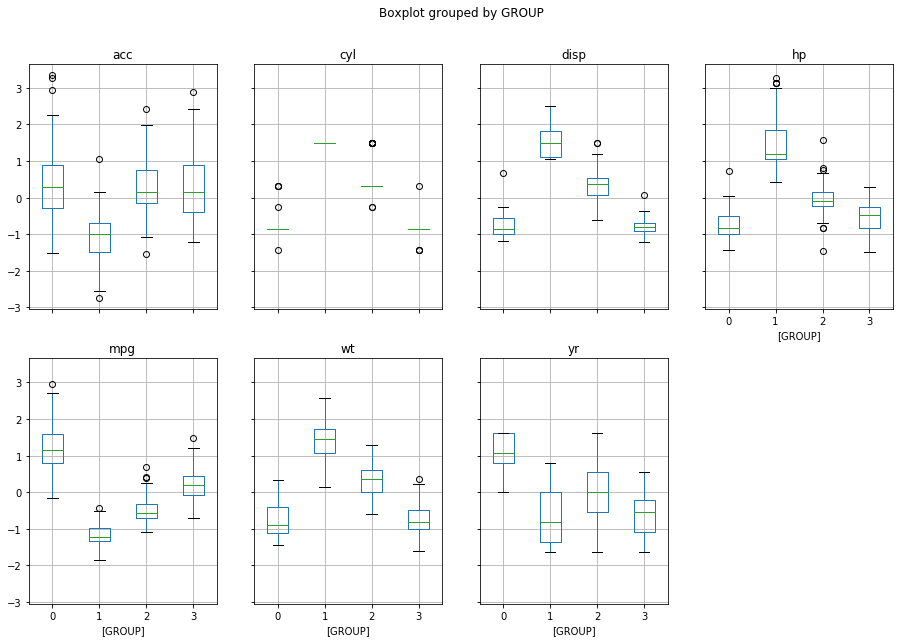

In [176]:
df_z2.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [177]:
def function(group):
    median,std=group.median(),group.std()
    outliers=(group-median).abs()>1.96*std
    group[outliers]=group.median()
    return group 

df_z_correct=(df_z2.groupby("GROUP").transform(function))


C:\Users\Abhyuday\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [178]:
new_data= df_z_correct.join(df_z2['GROUP'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A0A081780>,
      dtype=object)

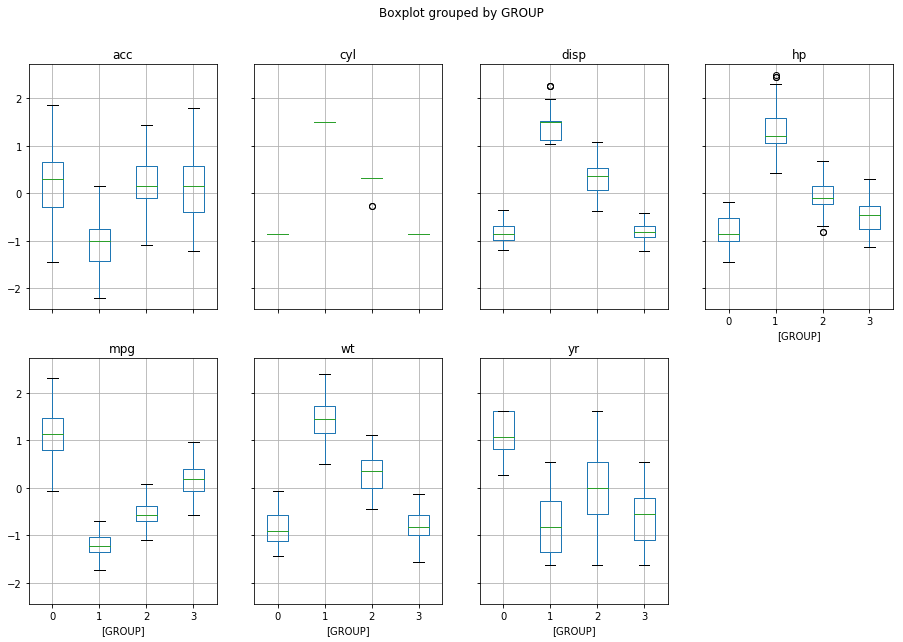

In [179]:
new_data.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [180]:
new_data=new_data.sort_values(by=["GROUP"])

In [181]:
reg0=new_data.loc[new_data["GROUP"]==0,:]
reg1=new_data.loc[new_data["GROUP"]==1,:]
reg2=new_data.loc[new_data["GROUP"]==2,:]
reg3=new_data.loc[new_data["GROUP"]==3,:]

In [182]:
X0=reg0.drop("mpg",axis=1)
y0=reg0[['mpg']]
X1=reg1.drop("mpg",axis=1)
y1=reg1[["mpg"]]
X2=reg2.drop('mpg',axis=1)
y2=reg2[['mpg']]
X3=reg3.drop("mpg",axis=1)
y3=reg3[['mpg']]

In [183]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.30 , random_state=221)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30 , random_state=224)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30 , random_state=222)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.30 , random_state=321)


In [184]:
regression_model = LinearRegression()
regression_model.fit(X_train0, y_train0)
regression_model.score(X_train0, y_train0)

0.43909235390884105

In [185]:
regression_model.score(X_test0, y_test0)

0.41335057703565936

In [186]:
for idx, col_name in enumerate(X_train0.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.0
The coefficient for disp is -1.0200878513833285
The coefficient for hp is 0.14672390877453673
The coefficient for wt is -0.4337850995569202
The coefficient for acc is -0.06932116351490189
The coefficient for yr is 0.21853537930897146
The coefficient for GROUP is 0.0


In [187]:
regression_model = LinearRegression()
regression_model.fit(X_train1, y_train1)
regression_model.score(X_train1, y_train1)


0.27265859926982905

In [188]:
regression_model.score(X_test1, y_test1)

0.3494791199807865

In [189]:
for idx, col_name in enumerate(X_train1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.853788949566291
The coefficient for disp is -0.058135097853021664
The coefficient for hp is -0.09811521327253253
The coefficient for wt is -0.1520104419343829
The coefficient for acc is -0.0984409172361932
The coefficient for yr is 0.06915134388959895
The coefficient for GROUP is 0.0


In [190]:
regression_model = LinearRegression()
regression_model.fit(X_train2, y_train2)
regression_model.score(X_train2, y_train2)

0.3149050332814701

In [191]:
regression_model.score(X_test2, y_test2)

0.15606371623136972

In [192]:
for idx, col_name in enumerate(X_train2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.016541899333794526
The coefficient for disp is 0.0634353142204767
The coefficient for hp is 0.03797609854086072
The coefficient for wt is -0.3340756288930696
The coefficient for acc is -0.009639052391355183
The coefficient for yr is 0.10825776163327662
The coefficient for GROUP is 0.0


In [193]:
regression_model = LinearRegression()
regression_model.fit(X_train3, y_train3)
regression_model.score(X_train3, y_train3)


0.4266639444522168

In [194]:
regression_model.score(X_test3, y_test3)

0.2916084693437221

In [195]:
for idx, col_name in enumerate(X_train3.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 0.0
The coefficient for disp is -0.18852036026421662
The coefficient for hp is -0.32033648192288305
The coefficient for wt is -0.5037636346692553
The coefficient for acc is -0.09572571511870637
The coefficient for yr is 0.026221557841987493
The coefficient for GROUP is 0.0


In [ ]:
# The accuracy of the models have not improved with four clusters . More EDA, feature engineering and feature selection might be required.
# Perhaps different models like SVR might provide better accuracies. 